MainProcess


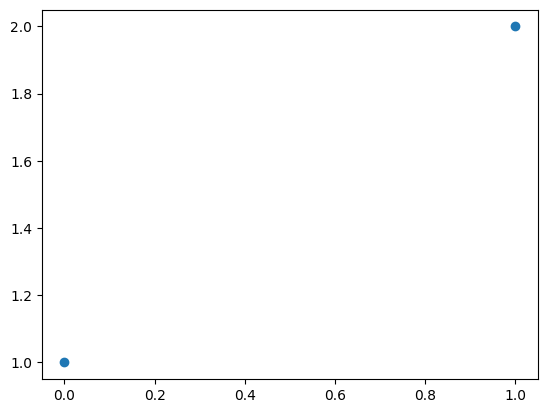

In [1]:
import sys
sys.path.append('d:/flagellar/code/core')
sys.path.append('/flagellar/code/core')
sys.path.append('/kaggle/input/my-flg-library/')
import flg_support as fls
import importlib
import numpy as np
import flg_diagnostics
import flg_numerics
import matplotlib.pyplot as plt
import glob
import copy
import flg_preprocess
import os
import flg_model
fls.profiling=False
plt.scatter([0,1],[1,2])

In [2]:
#Prepare datasets
# fls.download_kaggle_dataset('jeroencottaar/byu-many-models-2/', fls.result_dir + '/many_full_res/')

In [3]:
files = glob.glob(fls.result_dir + '/many_full_res/Baseline_1002_*')
assert len(files)==1
loaded_data = fls.dill_load(files[0])
print(loaded_data.modifier_values)

{'seed': 1002, 'n_ensemble': 3, 'n_epochs': 45, 'use_best_epoch': False, 'extra_data': True, 'trust_neg': 0, 'model_name': 'yolov8m'}


In [4]:
model = loaded_data.untrained_model
model.step1Labels.use_best_epoch = False
model.step1Labels.n_ensemble = 1
model.step1Labels.n_epochs = 21
model.train_data_selector.datasets = ['tom']
model.step1Labels.mosaic=0.0
model.step1Labels.close_mosaic = 100
model.step1Labels.cos_lr = False

In [ ]:
model.train(loaded_data.train_data, loaded_data.test_data)
fls.remove_and_make_dir(fls.temp_dir + '/intermediate_weights/')
import shutil
shutil.copytree(fls.temp_dir + '/yolo_weights/motor_detector/weights', fls.temp_dir + '/intermediate_weights/', dirs_exist_ok=True)
fls.dill_save(fls.temp_dir + '/intermediate_weights/model.pickle', model)

CompletedProcess(args=['pip', 'uninstall', '-y', 'albumentations'], returncode=0)


  0%|          | 0/572 [00:00<?, ?it/s]

Clearing pytorch


/opt/conda/lib/python3.11/site-packages/cupyx/jit/_interface.py:173: FutureWarning: cupyx.jit.rawkernel is experimental. The interface can change in the future.
  cupy._util.experimental('cupyx.jit.rawkernel')


  0%|          | 0/72 [00:00<?, ?it/s]


Preprocessing Complete:
- Training data: 572 tomograms, 0 motors, 0 slices
- Validation data: 72 tomograms, 0 motors, 0 slices
- Dataset directory: /flagellar/temp//yolo_dataset/
- YAML configuration: /flagellar/temp//yolo_dataset/dataset.yaml

Ready for YOLO training!
Starting YOLO training process...
Created new YAML at /flagellar/temp/training.yaml
Using YAML file: /flagellar/temp/training.yaml
YAML contents:
names:
  0: motor
path: /flagellar/temp//yolo_dataset/
train: images/train
val: images/val


Starting YOLO training...
New https://pypi.org/project/ultralytics/8.3.129 available 😃 Update with 'pip install -U ultralytics'
WARNING ⚠️ 'crop_fraction' is deprecated and will be removed in in the future.
Ultralytics 8.3.128 🚀 Python-3.11.10 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4090, 24210MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=None, batch=12, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=100, cls=0.5, conf=None, cop

train: Scanning /flagellar/temp/yolo_dataset/labels/train.cache... 2994 images, 265 backgrounds, 9 corrupt: 100%|██████████| 2994/2994 [00:00<?, ?it/s]

train: /flagellar/temp/yolo_dataset/images/train/tomo_a5ac23_z0166.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0908]
train: /flagellar/temp/yolo_dataset/images/train/tomo_a5ac23_z0167.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0908]
train: /flagellar/temp/yolo_dataset/images/train/tomo_a5ac23_z0168.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0908]
train: /flagellar/temp/yolo_dataset/images/train/tomo_a5ac23_z0169.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0908]
train: /flagellar/temp/yolo_dataset/images/train/tomo_a5ac23_z0170.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0908]
train: /flagellar/temp/yolo_dataset/images/train/tomo_a5ac23_z0171.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0908]
train: /flagellar/temp/yolo_dataset/imag

val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1860.8±1131.7 MB/s, size: 77.2 KB)


val: Scanning /flagellar/temp/yolo_dataset/labels/val.cache... 393 images, 24 backgrounds, 0 corrupt: 100%|██████████| 393/393 [00:00<?, ?it/s]


Plotting labels to /flagellar/temp/yolo_weights/motor_detector/labels.jpg... 
optimizer: AdamW(lr=0.001, momentum=0.937) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.00046875), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to /flagellar/temp/yolo_weights/motor_detector
Starting training for 21 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/21      4.81G      2.842       3.98      1.282         12        640: 100%|██████████| 249/249 [00:22<00:00, 11.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 12.40it/s]

                   all        393        369      0.394      0.447      0.356     0.0894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/21      5.69G      2.238      1.929      1.085         10        640: 100%|██████████| 249/249 [00:20<00:00, 11.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.34it/s]


                   all        393        369       0.73      0.653       0.74      0.253

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/21      5.69G      2.105      1.738      1.053         11        640: 100%|██████████| 249/249 [00:20<00:00, 12.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.39it/s]

                   all        393        369      0.766      0.748      0.823      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/21      5.69G      1.978      1.563      1.024          8        640: 100%|██████████| 249/249 [00:20<00:00, 12.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.30it/s]

                   all        393        369      0.755      0.591      0.645      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/21       5.7G      1.952      1.481      1.009         11        640: 100%|██████████| 249/249 [00:20<00:00, 12.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.31it/s]

                   all        393        369      0.876      0.816      0.888      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/21       5.7G      1.821      1.383     0.9863         12        640: 100%|██████████| 249/249 [00:20<00:00, 12.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 12.89it/s]

                   all        393        369      0.837      0.821      0.891      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/21       5.7G      1.782      1.325     0.9755         10        640: 100%|██████████| 249/249 [00:20<00:00, 12.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.20it/s]

                   all        393        369      0.811      0.872      0.896      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/21       5.7G      1.746      1.239     0.9656          9        640: 100%|██████████| 249/249 [00:20<00:00, 12.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.22it/s]

                   all        393        369      0.893      0.848      0.919      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/21       5.7G      1.704      1.229     0.9518         12        640: 100%|██████████| 249/249 [00:19<00:00, 12.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.34it/s]

                   all        393        369      0.852      0.878      0.927      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/21       5.7G      1.645      1.157     0.9384         10        640: 100%|██████████| 249/249 [00:19<00:00, 12.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.30it/s]

                   all        393        369      0.901      0.865      0.928      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/21       5.7G      1.591      1.082     0.9273         11        640: 100%|██████████| 249/249 [00:20<00:00, 12.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.34it/s]

                   all        393        369      0.926      0.918      0.961      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/21       5.7G       1.55      1.044     0.9175          8        640: 100%|██████████| 249/249 [00:20<00:00, 12.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.35it/s]

                   all        393        369      0.954      0.891      0.958      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/21       5.7G      1.502     0.9843     0.9098         11        640: 100%|██████████| 249/249 [00:20<00:00, 12.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.36it/s]

                   all        393        369      0.925      0.905      0.952      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/21       5.7G      1.439      0.946     0.9003         11        640: 100%|██████████| 249/249 [00:20<00:00, 12.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.39it/s]

                   all        393        369      0.953      0.875      0.933      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/21       5.7G      1.412     0.9138     0.8956         12        640: 100%|██████████| 249/249 [00:20<00:00, 12.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.33it/s]

                   all        393        369      0.973      0.905      0.953       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/21       5.7G      1.399     0.9226     0.8964         11        640: 100%|██████████| 249/249 [00:20<00:00, 12.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.37it/s]

                   all        393        369      0.962      0.927      0.946      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/21       5.7G      1.378     0.8937     0.8819         11        640: 100%|██████████| 249/249 [00:20<00:00, 12.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.43it/s]

                   all        393        369       0.96      0.914      0.957      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/21       5.7G      1.323     0.8324     0.8792         11        640: 100%|██████████| 249/249 [00:20<00:00, 12.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:01<00:00, 13.42it/s]

                   all        393        369      0.961      0.945      0.967      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/21       5.7G      1.279      0.804     0.8703         10        640:  82%|████████▏ | 204/249 [00:16<00:03, 12.54it/s]

In [ ]:
import ultralytics
import time
test_data = loaded_data.test_data
data_list = []
times = []
epoch_list = np.arange(0,21,20)
for epoch in epoch_list:
    t=time.time()
    model = fls.dill_load(fls.temp_dir + '/intermediate_weights/model.pickle')
    model.step1Labels.trained_model = [ultralytics.YOLO(fls.temp_dir + '/intermediate_weights/epoch' + str(epoch) + '.pt')]
    model.step1Labels.concentration = 2
    model.run_in_parallel=False
    data_list.append(model.infer(test_data))
    times.append(time.time()-t)
fls.dill_save(fls.temp_dir + 'intermediate_data.pickle', data_list)

In [ ]:
times

In [ ]:
data_list = fls.dill_load(fls.temp_dir + 'intermediate_data.pickle')
#epoch_list = [0,20,40,60,80,100,120,140]
import flg_diagnostics
import importlib
importlib.reload(flg_diagnostics)
scores = []
for d in data_list:
    a,b = flg_diagnostics.expand_and_reinfer(d, test_data, model.step3Output.select_motors, 0.7)
    scores.append(fls.score_competition_metric(a,b))
plt.plot(epoch_list,scores)
plt.grid(True)
plt.legend(['Precision', 'Recall', 'Score'])

yolov8m with extra data

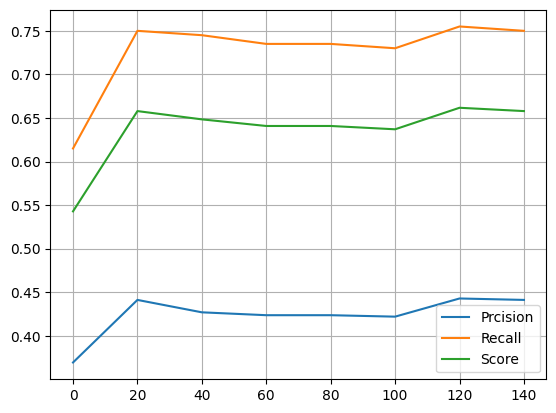

yolov8m no extra data

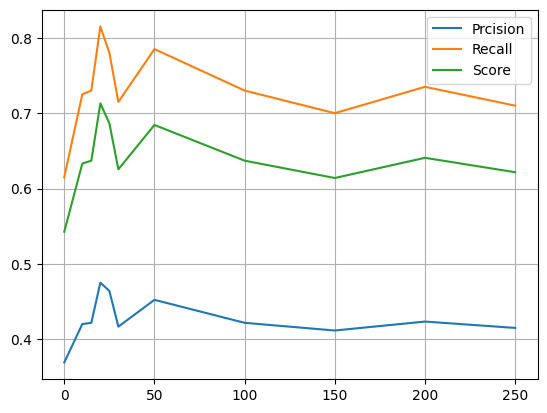

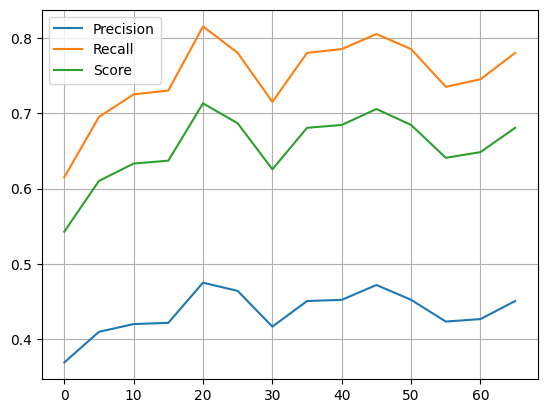

yolov8m no extra data no mosaic

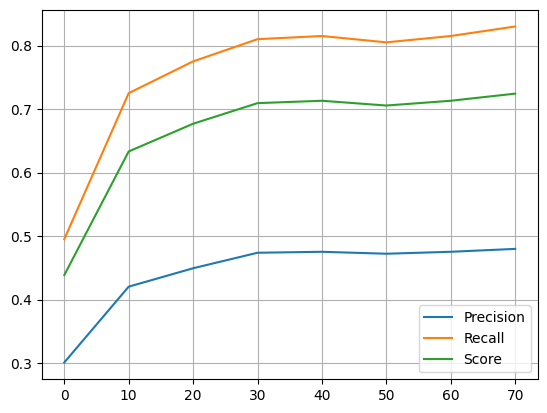

yolov8m no extra data no mosaic no cos_lr

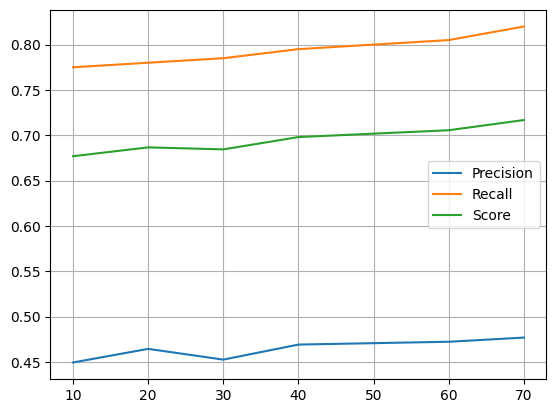

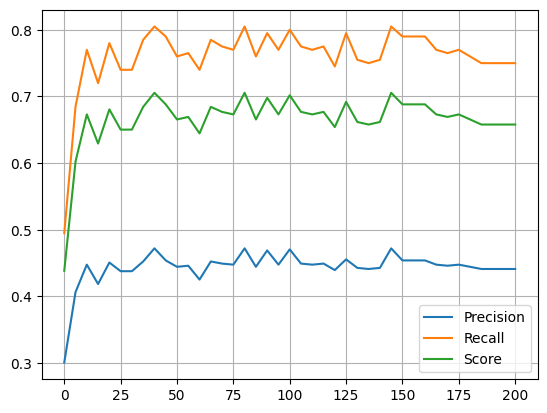

In [ ]:
import subprocess
def do_upload(library_name, local_dir):
    if fls.env=='vast':
        subprocess.run('rm -rf /kaggle_temp', shell=True)
        subprocess.run('mkdir /kaggle_temp/', shell=True)
        subprocess.run('kaggle datasets metadata -p /kaggle_temp/ ' + library_name, shell=True)
        subprocess.run('cp '+local_dir+' /kaggle_temp/', shell=True)
        subprocess.run('kaggle datasets version -p /kaggle_temp/ -m '+'x', shell=True)
    else:
        subprocess.run('cd d:/ && rd /s /q kaggle_temp', shell=True)
        subprocess.run('cd d:/ && d: && mkdir kaggle_temp', shell=True)
        subprocess.run('kaggle datasets metadata -p d:/kaggle_temp/ ' + library_name, shell=True)
        subprocess.run('cd d:/kaggle_temp/ && d: && copy '+local_dir+' d:', shell=True)
        subprocess.run('kaggle datasets version -p d:\\kaggle_temp\\ -m '+'x', shell=True)

In [ ]:
#do_upload('jeroencottaar/my-flg-models', fls.temp_dir + '/intermediate_weights/*.*')

In [ ]:
model.step1Labels.trained_model[0]